# Inference: Simple Linear Regression

- **simple linear regression**
    - effect size
    - p-value
    - interpretation

In [2]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

## The Question

What is the effect of Poverty Percentage on Teen Birth Rate?

$H_o$: There is no relationship between poverty percentage and teen birth rate ($\beta = 0$)

$H_a$: There is a relationship between poverty percentage and teen birth rate ($\beta \ne 0$)

## The Data

In [3]:
# read in file; specify that it is tab-separated file
df = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/index.txt', sep='\t')
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


## Assumptions of Linear Regression

1. Linear relationship
2. Multivariate normality
3. No multicollinearity
4. No auto-correlation
5. Homoscedasticity


## Exploratory Plot

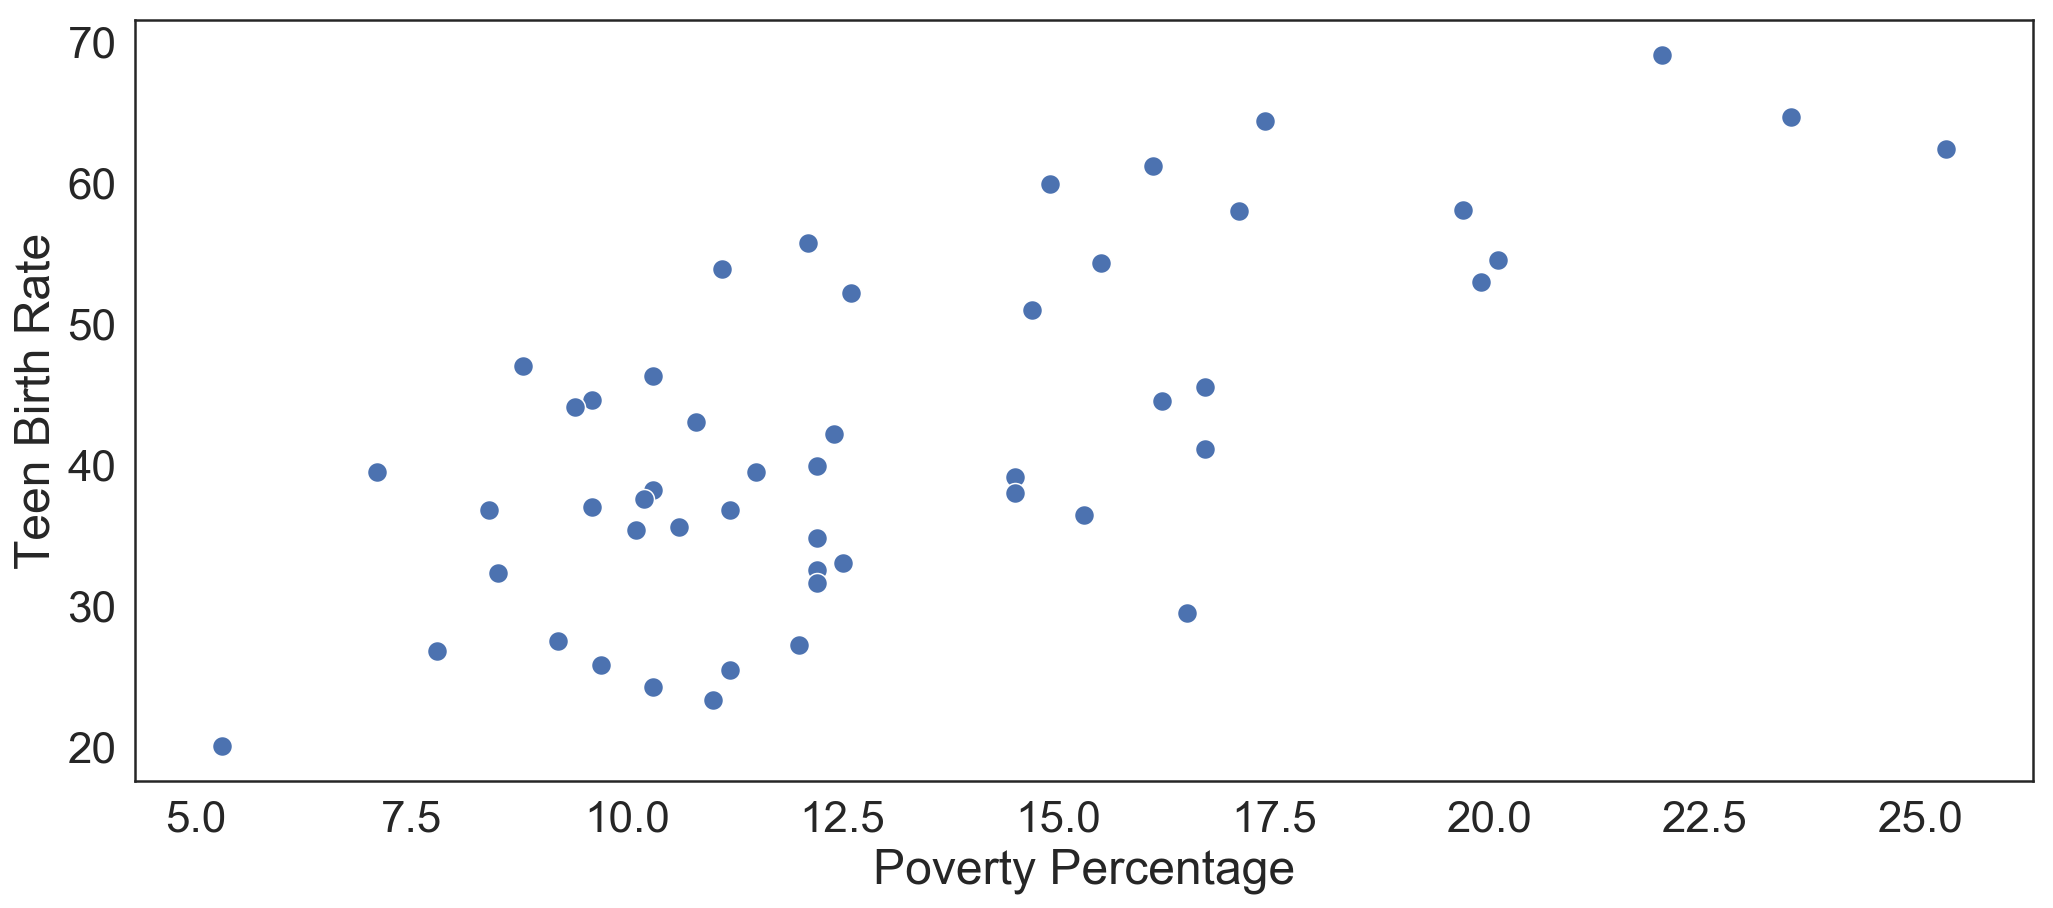

In [4]:
sns.scatterplot(x='PovPct', y='TeenBrth', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate');

We see there is some sort of relationship here, but we want to *measure that realtionship*. Given that the increase appears linear over time (Assumption #1), linear regreasssion allows us to do that.

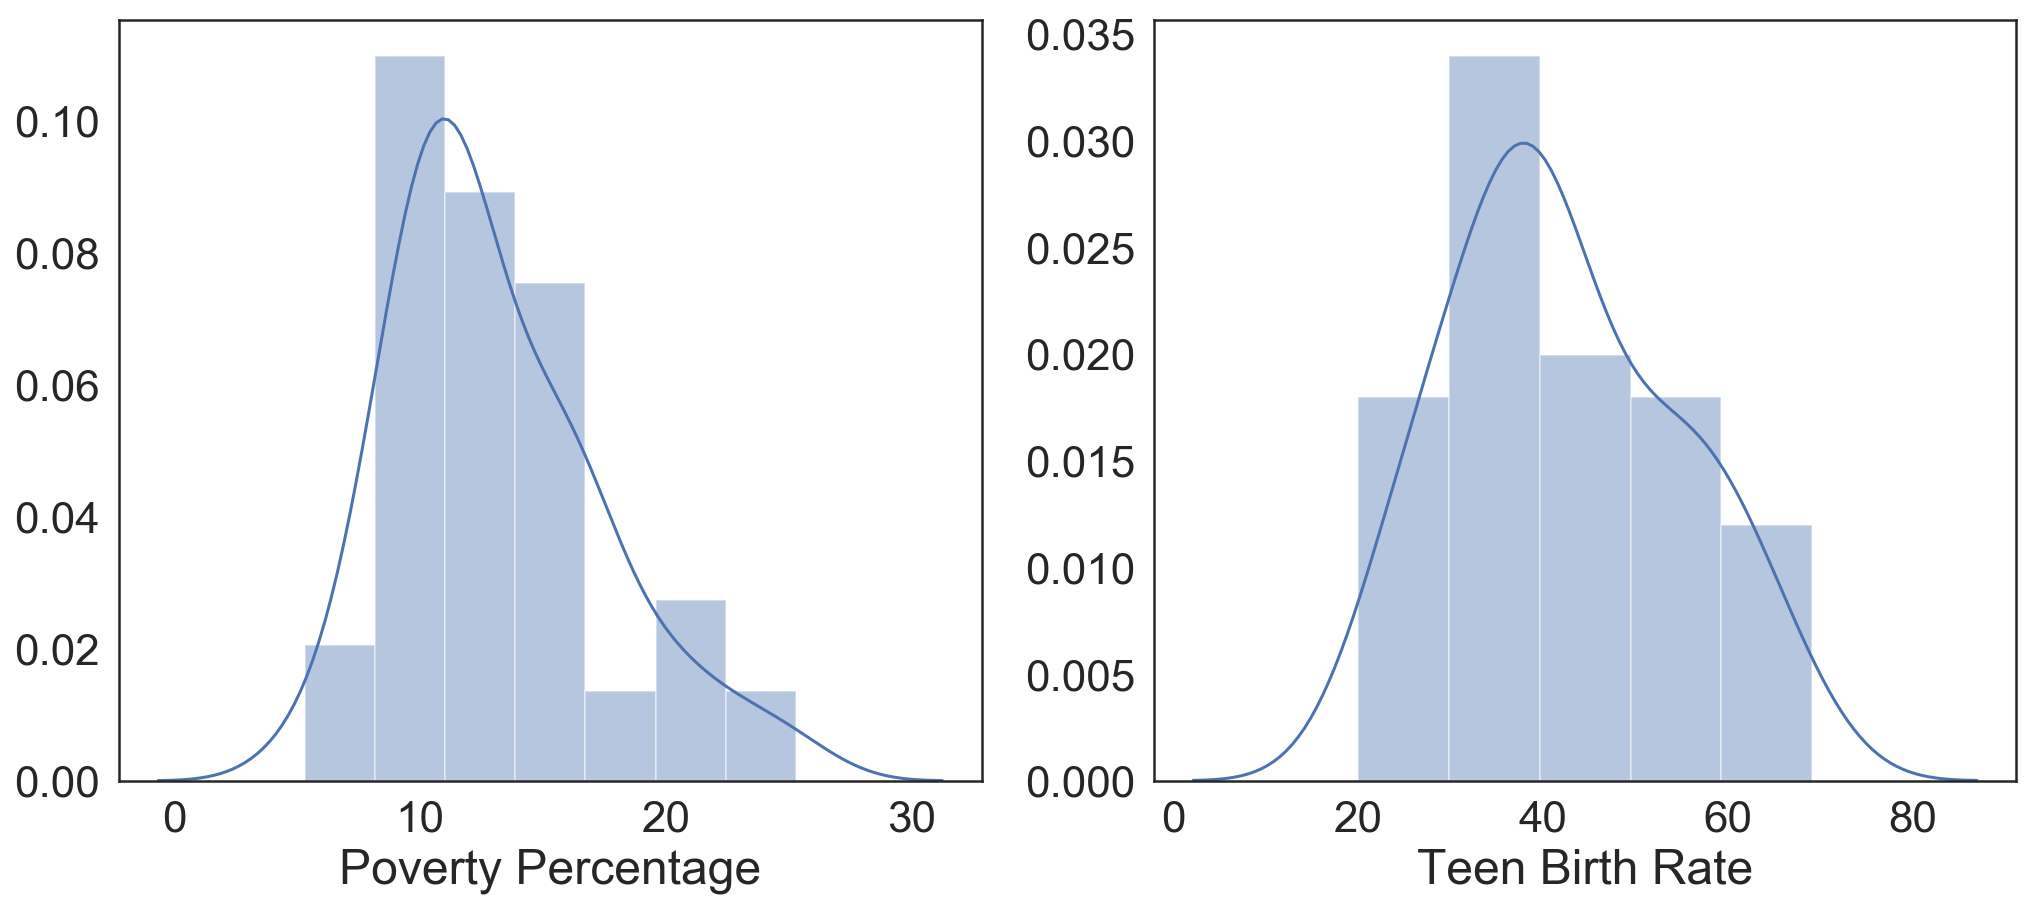

In [5]:
plt.subplot(1, 2, 1)
sns.distplot(df['PovPct'])
plt.xlabel('Poverty Percentage')

plt.subplot(1, 2, 2)
sns.distplot(df['TeenBrth'])
plt.xlabel('Teen Birth Rate');

## Linear Regression

$$outcome = \beta_0 + \beta_1*predictor$$

First, let's be sure we're on the same page about what our outcome is. Here, we're intererested in whether **Poverty Percentage (predictor)** impacts **Teen Birth Rate (outcome)**.

We can specify our design matrix using `patsy`.

In [7]:
outcome, predictors = patsy.dmatrices('TeenBrth ~ PovPct', df)

Now, that those are specified, let's run the model, using `statsmodels`.

In [8]:
mod = sm.OLS(outcome, predictors)

And, then we just have to fit the model and look at the results.

In [9]:
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           8.67e-09
Time:                        15:42:23   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

## Clicker Question

What is the effect size of the relationship between Poverty Percentage and Teen Birth Rate?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

There is a lot of information in there. Let's focus on the three pieces we discussed last lecture:

- `coef` : $\beta$ estimate explaining the effect size
- `std err` : standard error 
- `P>|t|` : the p-value

## Interpretation

$$outcome = \beta_0 + \beta_1*predictor$$

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

If the Poverty Percentage were 0, the Teen Birth Rate would be **15.67** (The Intercept, $\beta_0$)

For every 1 unit increase in Poverty Percentage, you expect to see a **2.03** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

In [10]:
## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           8.67e-09
Time:                        15:48:32   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

### Clicker Question #1

Which value represents the expected Teen Birth Rate if the Poverty Percentage were 0?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

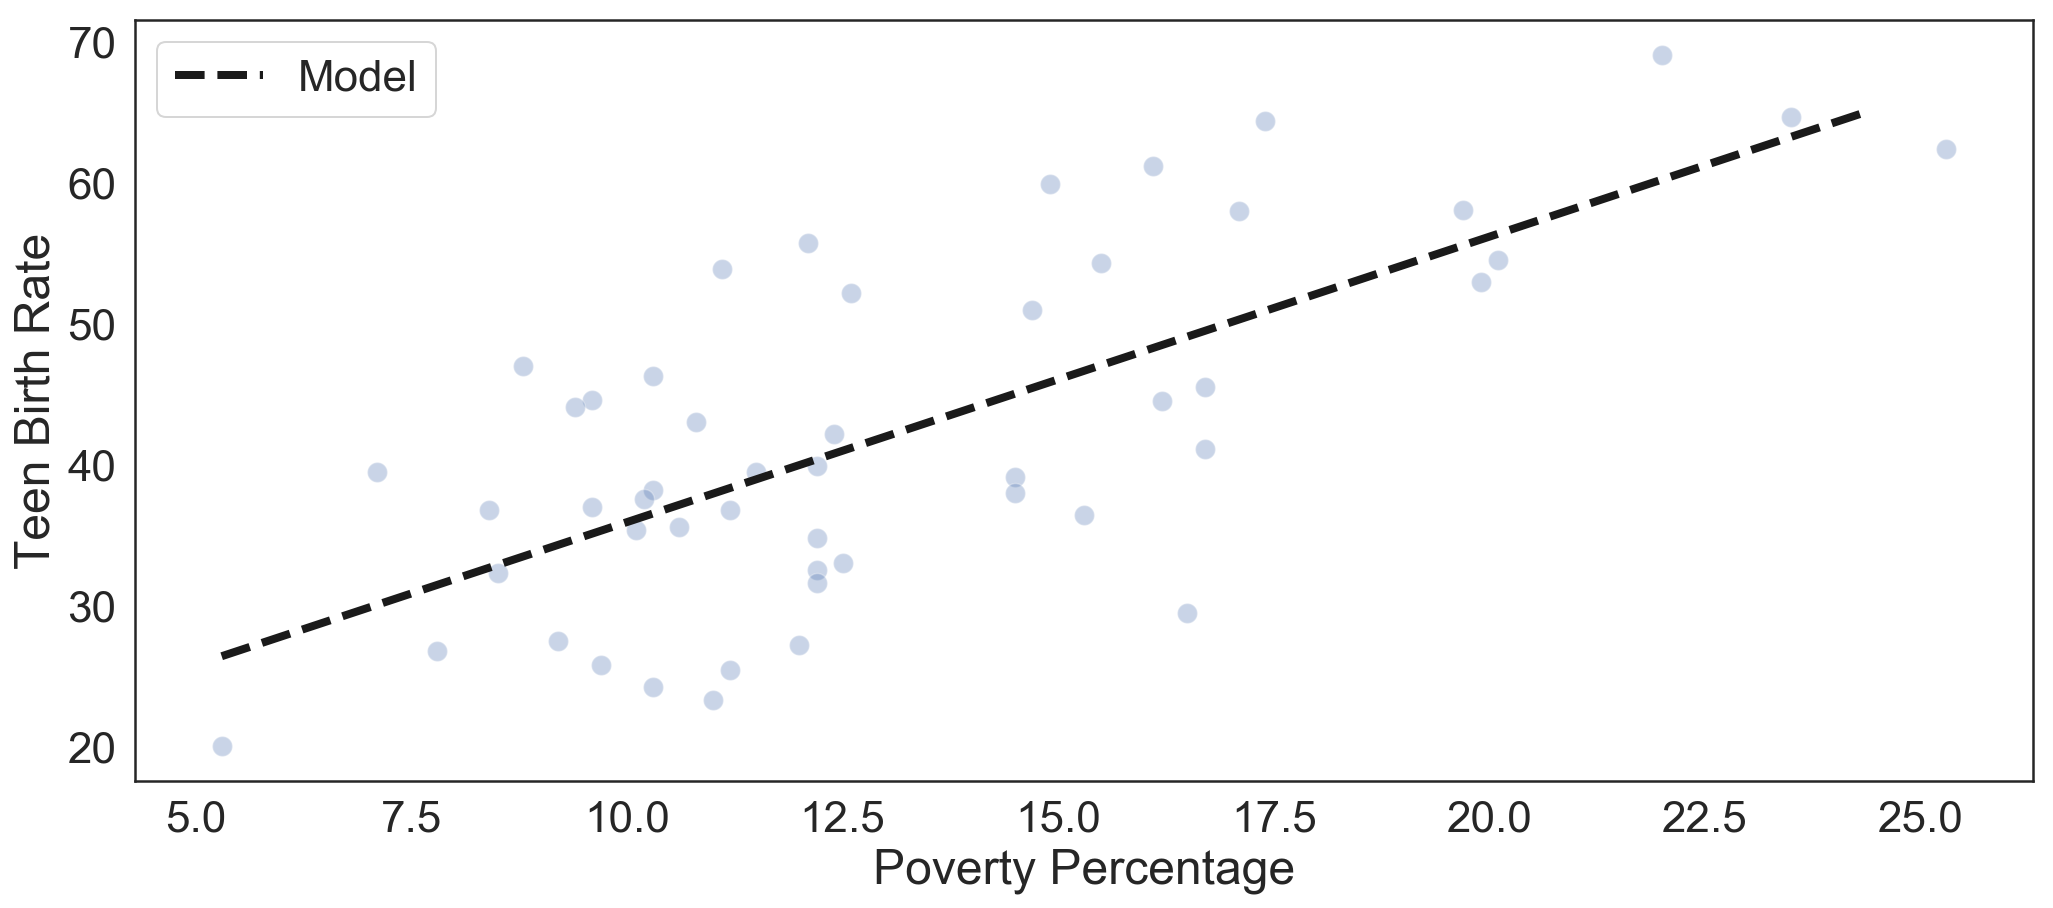

In [11]:
# Plot the orginal data (as before)
sns.scatterplot(x='PovPct', y='TeenBrth', alpha=0.3, data=df, s=100)

# Generate and plot the model fit line
xs = np.arange(df['PovPct'].min(), df['PovPct'].max())
ys = 2.0255 * xs + 15.67
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate')
plt.legend();

This is what we saw on previous videos. The model (the line) mathematically describes the relationship between the data points, but it doesn't explain the relationship *perfectly*. (All models are wrong!)

Note that this line is drawn in the following way:
- if you were to draw a perpendicular line from each point to the line and calculate that distance
- if you were to sum the distance across all points
- this line is the one that minimizes that sum

### Clicker Question #2

If I told you the Poverty Percentage of a state was 15, what would you estimate would be its Teen Birth Rate? 
- A) ~ 0
- B) ~ 30
- C) ~ 40
- D) ~ 50
- E) ~ 60

In [12]:
## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           8.67e-09
Time:                        15:51:00   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

### Clicker Question #3

Which of the following is a reasonable estimate (guess) for a state with a Poverty Percentage of 20?

- A) 55.99
- B) 56.27
- C) 56.5
- D) A - C
- E) None of the above

## Estimates

If I told you a locations' Poverty Percentage, what would you guess its Teen Birth Rate would be?

$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$

In [13]:
## if Poverty Percentage were 18
birth_rate = 15.67 + 2.03 * 18
birth_rate

52.21

In [14]:
## if Poverty Percentage were 12
birth_rate = 15.67 + 2.03 * 12
birth_rate

40.03

### Clicker Question #4

What is our conclusion from this analysis? (Question: What is the effect of Poverty Percentage on Teen Birth Rate?)

- A) Reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- B) Reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate
- C) Fail to reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- D) Fail to reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate
